In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('../data/train_set.csv')

In [3]:
def convert_to_time(df, cols):
    df[cols] = df[cols].apply(pd.to_datetime)
    return df

def convert_to_string(df, cols):
    df[cols] = df [cols].astype('str')
    return df

def convert_to_category(df, cols):
    df[cols] = df [cols].astype('category')
    return df


In [4]:
cols = ['order_purchase_timestamp', 'order_aproved_at', 
        'order_estimated_delivery_date', 'order_delivered_customer_date']
cols_string = ['order_status', 'customer_city', 'customer_state', 
               'product_category_name_english']
df = convert_to_time(df, cols)
df['total_wait_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['aproved_wait_time'] = (df['order_aproved_at'] - df['order_purchase_timestamp']).dt.days
df['estimated_wait_time'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['arrived_hour'] = df['order_delivered_customer_date'].dt.hour
df['arrived_day'] = df['order_delivered_customer_date'].dt.day
df['arrived_week_day'] = df['order_delivered_customer_date'].dt.dayofweek

In [5]:
df2 = df#.dropna()
x = df2.drop(['target', 'ID'],axis=1)
y = df2.target

In [17]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=12, 
             test_size=0.30)

In [18]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

gbr = XGBRegressor()


In [19]:
x_train = pd.get_dummies(xtrain['order_status'])#,  drop_first = True)
x_test = pd.get_dummies(xtest['order_status'])#,  drop_first = True)

x_test = x_test.reindex(columns = x_train.columns, fill_value=0)
xtrain = x_train.join(xtrain.drop('order_status', axis=1))
xtest = x_test.join(xtest.drop('order_status', axis=1))
xtrain

,canceled,delivered,invoiced,processing,shipped,unavailable,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,...,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,total_wait_time,aproved_wait_time,estimated_wait_time,arrived_hour,arrived_day,arrived_week_day
27625,0,0,0,1,0,0,67.5,35.55,3.0,1.0,...,garden_tools,57.0,2645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40848,0,1,0,0,0,0,199.7,15.17,1.0,1.0,...,fashion_shoes,55.0,344.0,3.0,7.0,0.0,12.0,15.0,24.0,4.0
10832,0,1,0,0,0,0,69.9,0.00,NaN,1.0,...,furniture_decor,44.0,903.0,6.0,15.0,0.0,-1.0,17.0,1.0,4.0
28333,0,1,0,0,0,0,84.9,17.84,NaN,1.0,...,fashion_shoes,57.0,404.0,4.0,19.0,0.0,14.0,18.0,28.0,0.0
335,0,1,0,0,0,0,219.9,13.88,1.0,1.0,...,perfumery,56.0,1224.0,3.0,6.0,1.0,13.0,10.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,0,1,0,0,0,0,79.9,15.31,1.0,NaN,...,health_beauty,54.0,762.0,1.0,14.0,0.0,9.0,11.0,18.0,4.0
40177,0,1,0,0,0,0,NaN,NaN,1.0,1.0,...,office_furniture,54.0,1283.0,1.0,15.0,0.0,34.0,16.0,16.0,3.0
19709,0,1,0,0,0,0,18.9,13.47,1.0,1.0,...,electronics,60.0,273.0,1.0,8.0,0.0,13.0,22.0,24.0,3.0
38555,0,1,0,0,0,0,155.0,15.84,1.0,1.0,...,fashion_underwear_beach,62.0,594.0,NaN,25.0,1.0,3.0,21.0,11.0,0.0


In [20]:
producto = pd.DataFrame(xtrain.join(ytrain).groupby('product_category_name_english').target.mean()).reset_index()
producto.columns = ['product_category_name_english','prod_media_target']
producto['prod_mediana_target'] = pd.DataFrame(xtrain.join(y).groupby('product_category_name_english').target.median()).reset_index()['target']
producto['prod_std_target'] = pd.DataFrame(xtrain.join(y).groupby('product_category_name_english').target.std()).reset_index()['target']
producto

,product_category_name_english,prod_media_target,prod_mediana_target,prod_std_target
0,agro_industry_and_commerce,4.187500,5.0,1.265857
1,air_conditioning,3.702381,4.5,1.596531
2,art,4.111111,5.0,1.281025
3,arts_and_craftmanship,4.500000,5.0,1.000000
4,audio,4.226667,5.0,1.214477
...,...,...,...,...
65,stationery,4.157182,5.0,1.261994
66,tablets_printing_image,4.000000,5.0,1.456438
67,telephony,4.000904,5.0,1.356399
68,toys,4.138255,5.0,1.333436


In [21]:
xtrain = xtrain.merge(producto, how='left')
xtest = xtest.merge(producto, how='left')

In [22]:
ytrain.shape, xtrain.shape

((38640,), (38640, 30))

In [23]:
xtest.shape

(16560, 30)

In [25]:
cols = [ 
    'order_products_value'
    ,'order_freight_value'
    ,'product_description_lenght'
    ,'product_name_lenght'
    ,'product_photos_qty'
    ,'order_items_qty'
    ,'order_sellers_qty'
    ,'total_wait_time'
    ,'aproved_wait_time'
    ,'estimated_wait_time'
    ,'arrived_hour'
    ,'arrived_day'
    ,'arrived_week_day'
    ,'canceled'
    ,'delivered'
    ,'invoiced'	
    ,'processing'	
    ,'shipped'	
    ,'unavailable'
    ,'prod_media_target'
    ,'prod_mediana_target'
    ,'prod_std_target'
]

gbr.fit(xtrain[cols], ytrain)
ypred = gbr.predict(xtest[cols])
r2_score(ytest, ypred)

0.23139674746555017

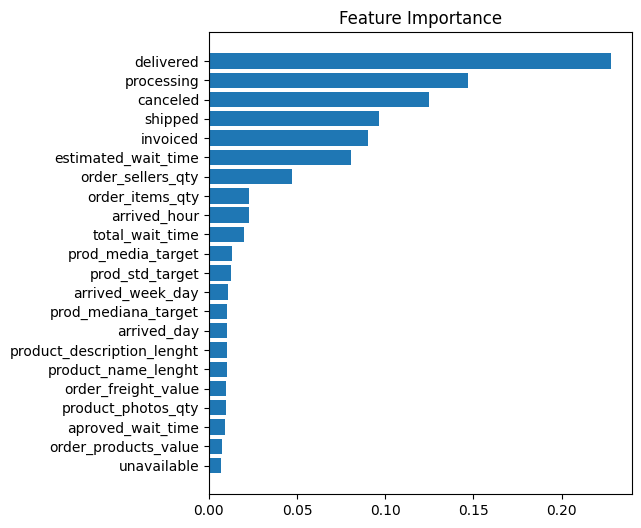

In [26]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(xtrain[cols].columns)[sorted_idx])
plt.title("Feature Importance")

plt.show()

In [28]:
predecir = pd.read_csv('../data/test_set.csv')
predecir.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
0,0,delivered,30.00,28.20,2.0,1.0,2017-06-22 20:28:16.000000,2017-06-22 20:42:51.013492,2017-07-14 00:00:00.000000,2017-09-19 15:17:37.767855,NaN,SP,48.0,health_beauty,17.0,547.0,1.0
1,1,delivered,89.90,12.33,1.0,1.0,NaN,2017-11-20 23:34:44.641435,2017-12-01 00:00:00.000000,2017-11-23 14:41:51.640086,Caieiras,SP,NaN,bed_bath_table,58.0,188.0,1.0
2,2,delivered,890.00,86.71,1.0,1.0,2018-02-12 12:31:32.000000,2018-02-15 03:55:50.384756,2018-03-09 00:00:00.000000,2018-02-27 15:19:06.698500,Sao Caetano do Sul,SP,95.0,health_beauty,57.0,537.0,1.0
3,3,delivered,85.00,17.84,1.0,NaN,2017-07-24 05:21:16.000000,NaN,2017-08-15 00:00:00.000000,2017-07-31 19:42:27.819239,Curitiba,PR,813.0,stationery,56.0,303.0,3.0
4,4,delivered,168.98,25.31,1.0,1.0,2018-03-29 22:20:33.000000,2018-03-29 22:30:18.256631,NaN,2018-05-15 15:05:44.342452,Aracaju,SE,490.0,bed_bath_table,60.0,496.0,2.0


In [27]:
def feature_enginering(df, df_producto):
    
    cols = ['order_purchase_timestamp', 'order_aproved_at', 
            'order_estimated_delivery_date', 'order_delivered_customer_date']
    cols_string = ['order_status', 'customer_city', 'customer_state', 
                'product_category_name_english']
    df = convert_to_time(df, cols)
    df['total_wait_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
    df['aproved_wait_time'] = (df['order_aproved_at'] - df['order_purchase_timestamp']).dt.days
    df['estimated_wait_time'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
    df['arrived_hour'] = df['order_delivered_customer_date'].dt.hour
    df['arrived_day'] = df['order_delivered_customer_date'].dt.day
    df['arrived_week_day'] = df['order_delivered_customer_date'].dt.dayofweek
    df_c = df.reindex(columns = x_train.columns, fill_value=0)
    df = df_c.join(df.drop('order_status', axis=1))
    df = df.merge(df_producto, how='left')
    return df

In [29]:
predecir = feature_enginering(predecir, producto)
predecir.head()

,canceled,delivered,invoiced,processing,shipped,unavailable,ID,order_products_value,order_freight_value,order_items_qty,...,product_photos_qty,total_wait_time,aproved_wait_time,estimated_wait_time,arrived_hour,arrived_day,arrived_week_day,prod_media_target,prod_mediana_target,prod_std_target
0,0,0,0,0,0,0,0,30.00,28.20,2.0,...,1.0,88.0,0.0,-68.0,15.0,19.0,1.0,4.186776,5.0,1.268793
1,0,0,0,0,0,0,1,89.90,12.33,1.0,...,1.0,NaN,NaN,7.0,14.0,23.0,3.0,3.935175,5.0,1.414043
2,0,0,0,0,0,0,2,890.00,86.71,1.0,...,1.0,15.0,2.0,9.0,15.0,27.0,1.0,4.186776,5.0,1.268793
3,0,0,0,0,0,0,3,85.00,17.84,1.0,...,3.0,7.0,NaN,14.0,19.0,31.0,0.0,4.157182,5.0,1.261994
4,0,0,0,0,0,0,4,168.98,25.31,1.0,...,2.0,46.0,0.0,NaN,15.0,15.0,1.0,3.935175,5.0,1.414043


In [30]:
predecir['target'] = gbr.predict(predecir[cols])
predecir.head()

,canceled,delivered,invoiced,processing,shipped,unavailable,ID,order_products_value,order_freight_value,order_items_qty,...,total_wait_time,aproved_wait_time,estimated_wait_time,arrived_hour,arrived_day,arrived_week_day,prod_media_target,prod_mediana_target,prod_std_target,target
0,0,0,0,0,0,0,0,30.00,28.20,2.0,...,88.0,0.0,-68.0,15.0,19.0,1.0,4.186776,5.0,1.268793,1.489264
1,0,0,0,0,0,0,1,89.90,12.33,1.0,...,NaN,NaN,7.0,14.0,23.0,3.0,3.935175,5.0,1.414043,4.325271
2,0,0,0,0,0,0,2,890.00,86.71,1.0,...,15.0,2.0,9.0,15.0,27.0,1.0,4.186776,5.0,1.268793,3.384282
3,0,0,0,0,0,0,3,85.00,17.84,1.0,...,7.0,NaN,14.0,19.0,31.0,0.0,4.157182,5.0,1.261994,4.217185
4,0,0,0,0,0,0,4,168.98,25.31,1.0,...,46.0,0.0,NaN,15.0,15.0,1.0,3.935175,5.0,1.414043,1.842997


In [73]:
predecir[['ID','target']].to_csv('../data/sum_01_R2_22.csv', index=False)

In [74]:
predecir.shape

(13800, 29)